In [1]:
from ucimlrepo import fetch_ucirepo 
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import time

In [2]:
RANDOM_STATE = 101

### Load Data

In [3]:
# Wine Quality Data
# fetch dataset 
wq_df = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wq_df.data.features 
y = wq_df.data.targets 

#### Train Test Split

In [4]:
# Split into training and testing sets. Don't use test set until the very end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE, stratify=y)

#### Balancing dataset

In [5]:
y = y_train
X = X_train

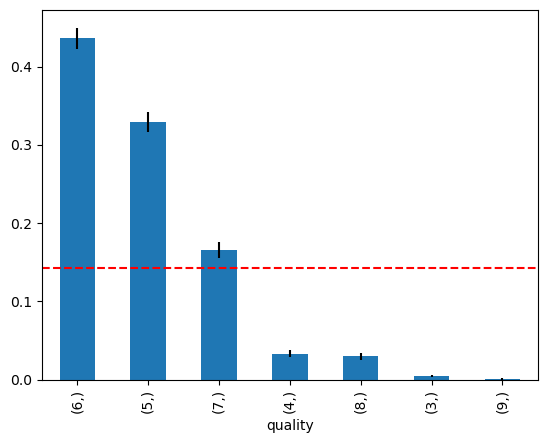

In [6]:
freqs =y.value_counts() /len(y)
std_errors = np.sqrt(freqs*(1-freqs)/len(y))
expected_frequency = 1/len(np.unique(y))

freqs.plot(kind='bar',yerr=std_errors*1.96)

plt.axhline(expected_frequency,color='red',linestyle='--')

### Model

#### Default

In [7]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', clf)])
t0 = time.time()
pipeline.fit(X_train, y_train)
print("Training time:", time.time()-t0)
y_pred = pipeline.predict(X_test)
# print(clf.feature_importances_)

Training time: 0.07606077194213867


In [8]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.21      0.21      0.21        43
           5       0.64      0.64      0.64       428
           6       0.65      0.63      0.64       567
           7       0.51      0.56      0.54       216
           8       0.40      0.44      0.41        39
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.35      0.35      0.35      1300
weighted avg       0.60      0.60      0.60      1300



/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [9]:
for i in range(len(X_train.columns)):
    print(X_train.columns[i], pipeline['model'].feature_importances_[i])

fixed_acidity 0.09020679932135739
volatile_acidity 0.08865120679843788
citric_acid 0.10036667895714269
residual_sugar 0.0605491326299866
chlorides 0.12679510306898162
free_sulfur_dioxide 0.11757587905980514
total_sulfur_dioxide 0.07077236765740333
density 0.06312957822501733
pH 0.09053078525824566
sulphates 0.06978353466437434
alcohol 0.1216389343592481


In [10]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', clf)])
train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train, cv = 4,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

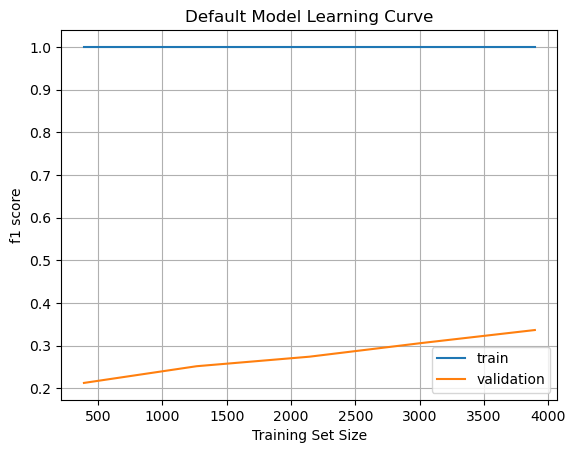

In [11]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, validation_mean, label="validation")

plt.title("Default Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.grid()
plt.show()


#### Final Model

In [12]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', clf)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [13]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.21      0.21      0.21        43
           5       0.64      0.64      0.64       428
           6       0.65      0.63      0.64       567
           7       0.51      0.56      0.54       216
           8       0.40      0.44      0.41        39
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.35      0.35      0.35      1300
weighted avg       0.60      0.60      0.60      1300



/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [14]:
# train_sizes = [.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, 1]
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', clf)])
train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train, cv = 4,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

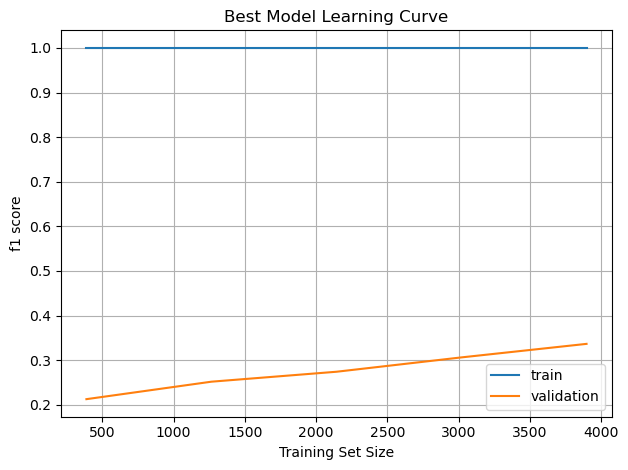

In [15]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)


plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, validation_mean, label="validation")

plt.title("Best Model Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.savefig('wine_plots/decision_tree_wq_best_learning_curve.png')
plt.show()

#### Sub/Optimal Learning Curve

In [16]:
# Suboptimal Model
clf = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=.001)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', clf)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [17]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.12      0.42      0.18        43
           5       0.54      0.50      0.52       428
           6       0.56      0.25      0.34       567
           7       0.31      0.50      0.39       216
           8       0.17      0.54      0.25        39
           9       0.00      0.00      0.00         1

    accuracy                           0.39      1300
   macro avg       0.24      0.32      0.24      1300
weighted avg       0.48      0.39      0.40      1300



In [18]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=.001)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', clf)])
train_sizes, train_scores, validation_scores = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train, cv = 4,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

clf = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=0)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', clf)])
train_sizes1, train_scores1, validation_scores1 = learning_curve(
estimator = pipeline,
X = X_train,
y = y_train, cv = 4,
scoring = 'f1_macro',
random_state=RANDOM_STATE)

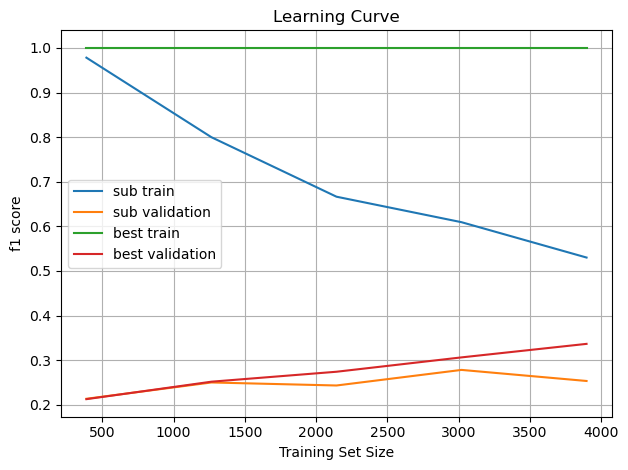

In [19]:
train_mean = train_scores.mean(axis=1)
validation_mean = validation_scores.mean(axis=1)
train_mean1 = train_scores1.mean(axis=1)
validation_mean1 = validation_scores1.mean(axis=1)

plt.plot(train_sizes, train_mean, label="sub train")
plt.plot(train_sizes, validation_mean, label="sub validation")
plt.plot(train_sizes1, train_mean1, label="best train")
plt.plot(train_sizes1, validation_mean1, label="best validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("f1 score")
plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.savefig('wine_plots/decision_tree_wq_combo_learning_curve.png')
plt.show()

### Validation Plot

In [20]:
from sklearn.model_selection import validation_curve
import numpy as np

#### CCP ALPHA (Pruning)

In [21]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', clf)])
parameter_range = [0, .001, .01, .1, .15]
train_score, test_score = validation_curve(pipeline, X_train, y_train,
                                           param_name="model__ccp_alpha",
                                           param_range=parameter_range,
                                           cv=4, scoring="f1_macro")

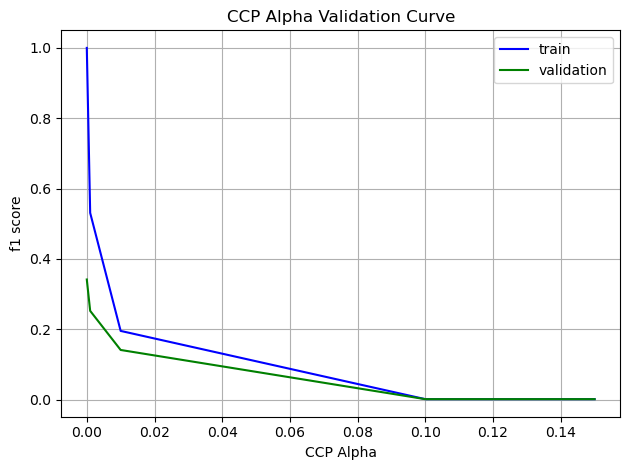

In [22]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="train", color='b')
plt.plot(parameter_range, mean_test_score,
         label="validation", color='g')
 
# Creating the plot
plt.title("CCP Alpha Validation Curve")
plt.xlabel("CCP Alpha")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc='best')
plt.grid()
plt.savefig('wine_plots/decision_tree_wq_ccp_alpha_validation.png')
plt.show()

#### Max Depth

In [23]:
parameter_range = [1, 5, 10, 20, 50]
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
sm = SMOTE(random_state=RANDOM_STATE)
norm = MinMaxScaler()
train_score, test_score = validation_curve(clf, X_train, y_train,
                                           param_name="max_depth",
                                           param_range=parameter_range,
                                           cv=4, scoring="f1_macro")

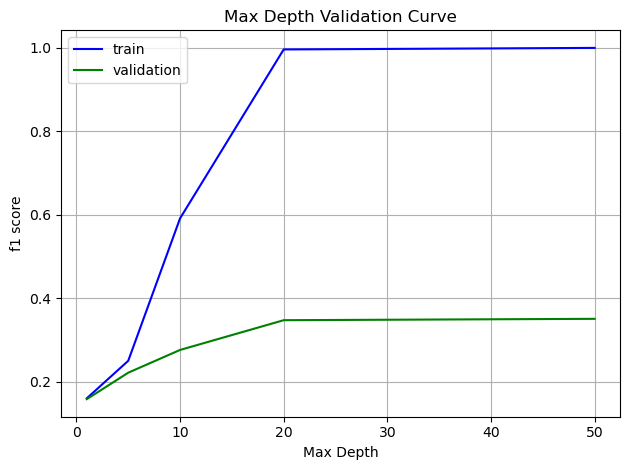

In [24]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="train", color='b')
plt.plot(parameter_range, mean_test_score,
         label="validation", color='g')

# Creating the plot
plt.title("Max Depth Validation Curve")
plt.xlabel("Max Depth")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc='best')
plt.grid()
plt.savefig('wine_plots/decision_tree_wq_max_depth_validation.png')
plt.show()

### Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
os = RandomOverSampler(random_state=RANDOM_STATE)
norm = MinMaxScaler()
pipeline = Pipeline([('norm', norm), ('os', os), ('model', clf)])
params = [{'model__ccp_alpha':[0, .001, .0025, .005, .0075, .01, .1, .25],
          'model__criterion': ['gini'],
          'model__splitter': ['best'],
          'model__max_depth': [None, 1, 5, 10, 50, 100]}]
grid = GridSearchCV(pipeline,
                      param_grid=params,
                      scoring='f1_macro',
                      cv=4)
grid.fit(X_train, y_train)
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

{'model__ccp_alpha': 0, 'model__criterion': 'gini', 'model__max_depth': None, 'model__splitter': 'best'}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.21      0.21      0.21        43
           5       0.64      0.64      0.64       428
           6       0.65      0.63      0.64       567
           7       0.51      0.56      0.54       216
           8       0.40      0.44      0.41        39
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.35      0.35      0.35      1300
weighted avg       0.60      0.60      0.60      1300



/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/VivianNTran/anaconda3/envs/ML_A1_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,